In [28]:
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d
from mathutils.geometry import intersect_point_line
from numpy.linalg import norm

In [2]:
PATH = r"./data/"
train_filename = "train_smaller100.csv.gz"
test_filename = "test_smaller100.csv.gz"

In [3]:
train, test = utils.load_small_data_csv(PATH,train_filename,test_filename, utils.SIMPLE_FEATURE_COLUMNS)

In [4]:
print("The columns are as follows:", train.columns)
print("The shape is as follows:", train.shape)

The columns are as follows: Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[

In [5]:
# Extract the columns with information on the location of the particle
Location_info = train.loc[: , "MatchedHit_X[0]":"MatchedHit_Z[3]"]

In [6]:
vvlist = pd.DataFrame([])
PointResiduals = np.array([])
# Make the actual fit for each particle
for i in range(0,train.shape[0]):
    
    ResidualsSize = 0
    
    # Extracting info on the i-th particle's coordinates
    Particle_Path_Points = Location_info.loc[i,:]
    X = Particle_Path_Points.loc['MatchedHit_X[0]':'MatchedHit_X[3]'].values
    Y = Particle_Path_Points.loc['MatchedHit_Y[0]':'MatchedHit_Y[3]'].values
    Z = Particle_Path_Points.loc['MatchedHit_Z[0]':'MatchedHit_Z[3]'].values
    
    data = np.concatenate((X[:, np.newaxis], 
                       Y[:, np.newaxis], 
                       Z[:, np.newaxis]), 
                      axis=1)

    datamean = data.mean(axis=0)
    
    # uu, dd and vv contain information on the fit. In fact, vv[0] contains the direction of the best fit (least squares)
    uu, dd, vv = np.linalg.svd(data - datamean)
    
    # Best fit line with length between -2500 and 2500 with 2 datapoints (it's a straight line so that's enough)
    linepts = vv[0] * np.mgrid[-2500:2500:2j][:, np.newaxis]

    # Shift by the mean to get the line in the right place (centered)
    linepts += datamean
    
    # Do a little loop where we add the residuals of all four of the points
    for j in range (0,4):
        intersect = intersect_point_line(data[j], linepts[0], linepts[1])
        ResidualsSize += abs(sum(data[j] - intersect[0]))
    
    PointResiduals = np.append(PointResiduals, ResidualsSize)

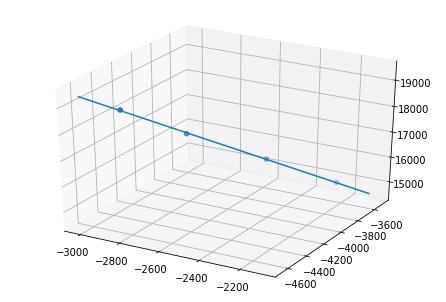

In [7]:
# Best fit line with length between -2500 and 2500 with 2 datapoints (it's a straight line so that's enough)
linepts = vv[0] * np.mgrid[-2500:2500:2j][:, np.newaxis]

# Shift by the mean to get the line in the right place (centered)
linepts += datamean

# Plotting
ax = m3d.Axes3D(plt.figure())
ax.scatter3D(*data.T)
ax.plot3D(*linepts.T)
plt.imshow
plt.show()

In [23]:
data

array([[-2205.88  , -3648.9219, 15188.96  ],
       [-2435.7   , -3937.8052, 16392.12  ],
       [-2700.97  , -4225.4673, 17583.883 ],
       [-2885.67  , -4511.5947, 18790.953 ]])

In [36]:
DataFirstTwo = data[0:2,:]

In [37]:
datamean = DataFirstTwo.mean(axis=0)
uu, dd, vv = np.linalg.svd(DataFirstTwo - datamean)

In [38]:
FirstLineAngle = vv[0]

In [39]:
DataSecondTwo = data[2:4,:]

In [40]:
datamean = DataSecondTwo.mean(axis=0)
uu, dd, vv = np.linalg.svd(DataSecondTwo - datamean)

In [41]:
SecondLineAngle = vv[0]

In [45]:
## Finding the angle between the vectors made up by the first and second line. Simply dot product as both lines are normalized (norm=1 for both)
Angle = np.dot(FirstLineAngle,SecondLineAngle)

In [46]:
Angle

0.9993537841986807